In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

import re
import string
from typing import List

from nltk.probability import FreqDist 
from nltk.corpus import webtext, stopwords
from warnings import filterwarnings
filterwarnings('ignore') 

In [2]:
wt_sentences = webtext.sents('firefox.txt')
wt_words = webtext.words('firefox.txt')

print(len(wt_sentences), "|", len(wt_words))

1142 | 102457


## Remove all punctuations and unwanted spaces from the text:

In [3]:
sentence = "I'm not such a great person!"
for c in string.punctuation :
    sentence = sentence.replace(c, "")
print(sentence)

Im not such a great person


In [10]:
def remove_punctuations(text: List) -> str :
    punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
    for ele in text :
        if ele in punc :
            text = text.replace(ele, "")
    return text

In [11]:
wt_words = [remove_punctuations(i) for i in wt_words]
print(wt_words[:20])

['Cookie', 'Manager', '', '', 'Don', '', 't', 'allow', 'sites', 'that', 'set', 'removed', 'cookies', 'to', 'set', 'future', 'cookies', '', 'should', 'stay']


In [13]:
# Here we remove extra spaces from wt_words :
wt_words = [word.translate(string.punctuation) for word in wt_words if word]
print(wt_words[:20])

['Cookie', 'Manager', 'Don', 't', 'allow', 'sites', 'that', 'set', 'removed', 'cookies', 'to', 'set', 'future', 'cookies', 'should', 'stay', 'checked', 'When', 'in', 'full']


In [17]:
# removing stop words here :
stop_words = stopwords.words('english')
wt_words = [word for word in wt_words if not word in stop_words]
print(wt_words[:20])

['Cookie', 'Manager', 'Don', 'allow', 'sites', 'set', 'removed', 'cookies', 'set', 'future', 'cookies', 'stay', 'checked', 'When', 'full', 'screen', 'mode', 'Pressing', 'Ctrl', 'N']


## Compute the frequency of the words :

In [18]:
freq_dist = FreqDist(wt_words) 

## Considering words larger than legth of 3

In [19]:
larg_words = dict([(k, v) for k, v in freq_dist.items() if len(k) > 3])

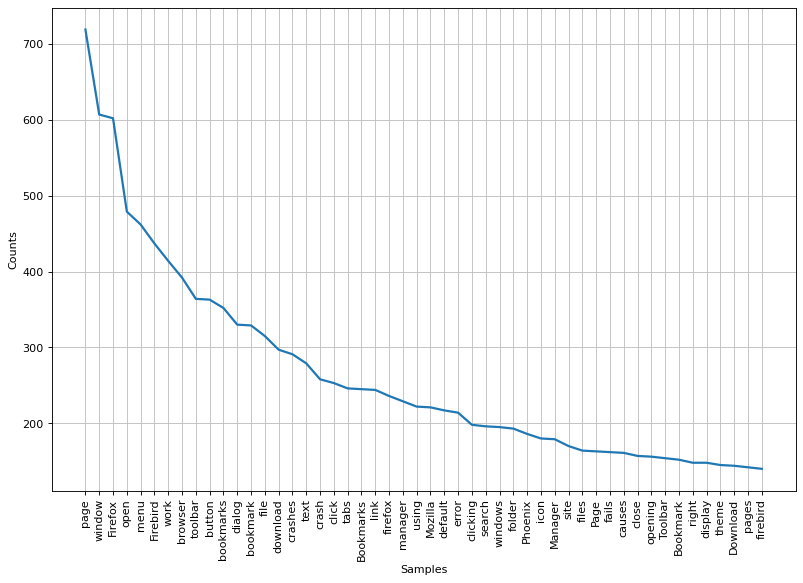

In [20]:
plt.figure(figsize = (12, 8), dpi = 80)
freq_dist = FreqDist(larg_words)
freq_dist.plot(50, cumulative = False);

## Build Wordcloud :

In [21]:
from wordcloud import WordCloud

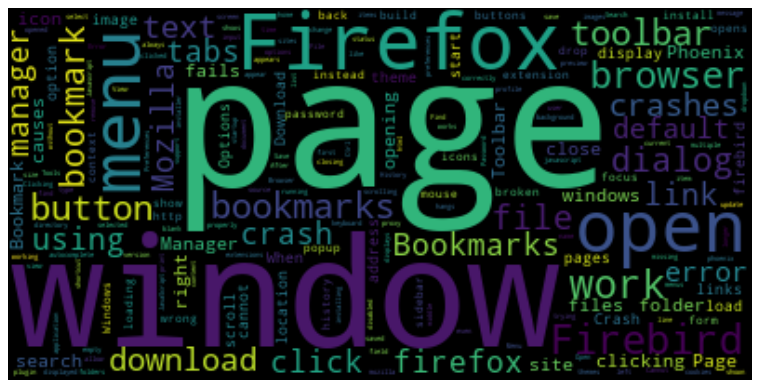

In [24]:
wcloud = WordCloud().generate_from_frequencies(freq_dist)
plt.figure(figsize = (12, 8), dpi = 80)
plt.imshow(wcloud, interpolation = 'bilinear')
plt.axis('off')
(-.5, 399.5, 199.5, -.5)
plt.show()